In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
tf.__version__

'2.4.1'

In [3]:
len(tf.config.list_physical_devices('GPU'))

1

In [4]:
def preprocess(array):
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=array.shape
    )
    return np.clip(noisy_array, 0.0, 1.0)

def display(array1, array2):
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]
    
    plt.figure(figsize=(29, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [5]:
(train_data, _), (test_data, _) = mnist.load_data()

In [6]:
train_data = preprocess(train_data)
test_data = preprocess(test_data)

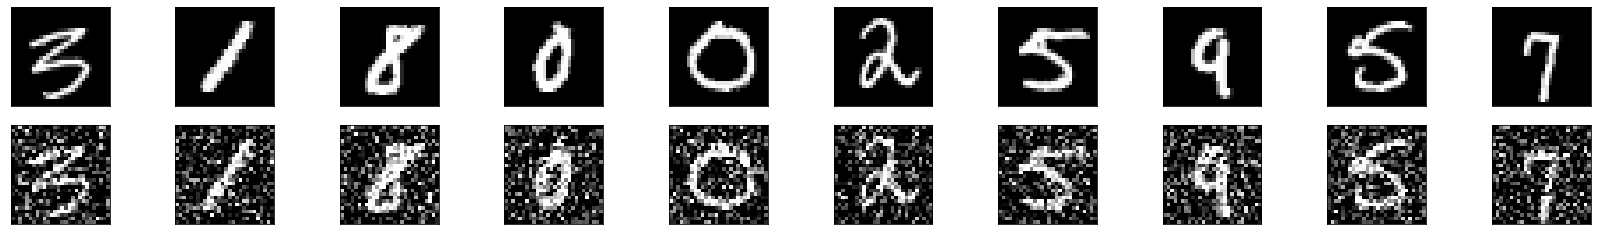

In [7]:
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

display(train_data, noisy_train_data)

In [8]:
# tf.debugging.set_log_device_placement(True)

In [9]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        9248  

In [10]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=3,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/3
469/469 [==============================] - 15s 25ms/step - loss: 0.2465 - val_loss: 0.0729
Epoch 2/3
469/469 [==============================] - 9s 20ms/step - loss: 0.0725 - val_loss: 0.0693
Epoch 3/3
469/469 [==============================] - 9s 20ms/step - loss: 0.0695 - val_loss: 0.0679


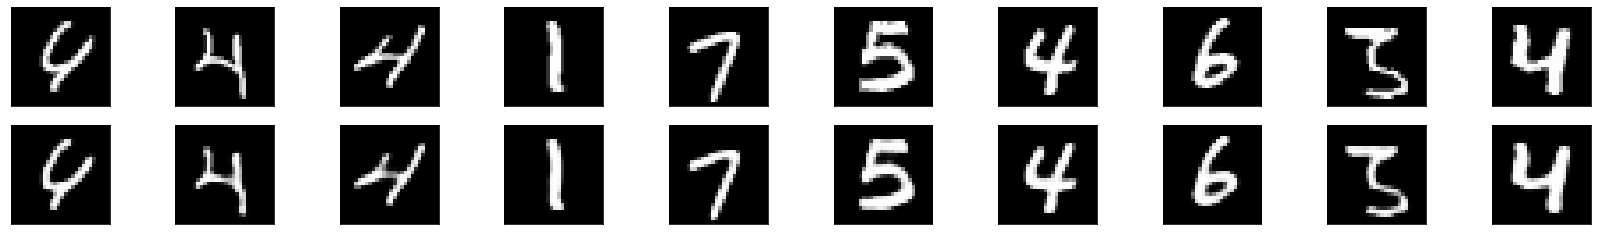

In [11]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [12]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=3,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/3
469/469 [==============================] - 9s 20ms/step - loss: 0.1018 - val_loss: 0.0945
Epoch 2/3
469/469 [==============================] - 9s 20ms/step - loss: 0.0943 - val_loss: 0.0924
Epoch 3/3
469/469 [==============================] - 9s 20ms/step - loss: 0.0924 - val_loss: 0.0909


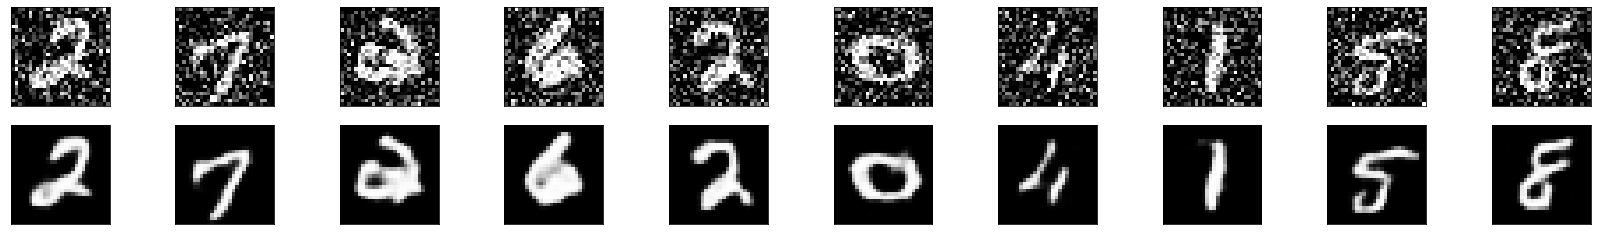

In [13]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)